In [1]:
# First we need to import all the necessary toolboxes...
from scipy.optimize import fsolve 
# import all the standard math functions and plotting stuff we'd want from numpy and matplotlib
from numpy import*
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline 

# Chapter 3: Instrument hanger example

You are to review the design of an instrument hanger (D = 25 mm, k = 60 W/mK), to be fixed to the side of an insulated furnace. THe hanger is welded to the furnace wall ($T_w = 200^oC$), and protrudes through the insulation ($L_{ins} = 200 mm$). In order to ensure tha there is no risk to the cable, the temperature of the exposed portion cannot exceed 100$^oC$

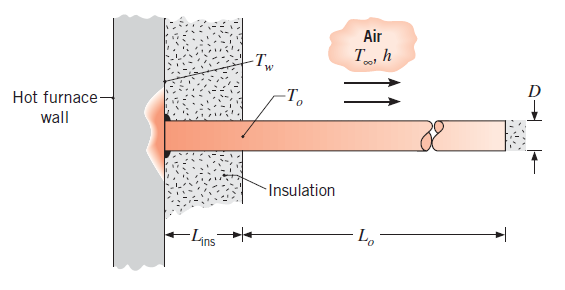

# Assumptions:
- s.s.
- constant properties
- 1-D
- Adiabatic fin tip

For such a case, the resistance through the fin (i.e., exposed rod) can be found via: 

$$
R_{rod} = \frac{\Theta_b}{q_{fin}} = \frac{1}{M\tanh[mL_o]} = \frac{1}{\sqrt{hPkA_c}\tanh\left[\sqrt{hP / k A_c}L_o\right]}
$$

where $P$ is the perimeter of the rod; $A_c$ the cross-sectional area; $L_o$ the exposed portion of the rod, whcih acts as a fin; and $\Theta_b = T_o - T_\infty$, which is the max $\Delta T$ from the rod base ($T_o$) to $T_\infty$

Furthermore, the temperature distribution from the exposed base to the rod tip ($L_o$) is:

$$
\frac{\Theta}{\Theta_b} = \frac{T(x) - T_\infty}{T_o - T_\infty} = \frac{\cosh\left[m\left(L_o-x\right)\right]}{\cosh\left[mL_o\right]} = \frac{\cosh\left[\sqrt{hP / k A_c}\left(L_o-x\right)\right]}{\cosh\left[\sqrt{hP / k A_c}L_o\right]}
$$

where the resistance from the furnace wall to the exposed based of the rod can be treated as a plane wall:

$$
R_{ins} = \frac{L_{ins}}{k A_c} = \frac{T_w - T_o}{q_{fin}}
$$

In [2]:
# setting constants
Tinf = 25 + 273 # K
h = 15 # W/m2K
k = 60 # W/mK (60 is default)
D = 0.025 # mm diameter rod
Ac = pi*D**2/4 # m2 cross-sect area of hanger rod
P = pi*D # m perimeter of rod
Lins = .2 # m insulation thickness 
Lo = .4-Lins # mm length uninsulated rod (assume this is the correccted length)

m = sqrt((h*P)/(k*Ac)) # calculating the constant, m
Tw = 200+273 # K wall temp of furnace

In [3]:
# Finding  q_fin
q = sqrt(h*P*Ac*k)*(Tw-Tinf)*tanh(m*Lo)
print(f'The total heat transfer rate, q_fin = {q:0.3f} W')

# Creating linear spaces to find T(x)
zz1 = linspace(0,Lins)
zz2 = linspace(0,Lo)+Lins

# Resistances
Rins = Lins/(k*Ac) # thermal resistance of insulated portion of rod
Rrod = 1/(sqrt(h*P*k*Ac)*tanh(m*Lo)) # thermal resistance of uninsulated portion
Rtot = Rins + Rrod # total thermal resistance

# Temp profile in rod
To = (Tw-Tinf)*Rrod/Rtot + Tinf # K
print(f'The temp at the base of the exposed rod, To = {To:0.2f} K')

# Temp profiles
T1 = (To-Tw)*zz1/Lins + Tw # should be linear b/c its bascially a plane wall
T2 = (To-Tinf)*cosh(m*(Lo-(zz2-Lins)))/cosh(m*Lo) + Tinf # not linear due to drop off along hanger

The total heat transfer rate, q_fin = 27.787 W
The temp at the base of the exposed rod, To = 382.21 K


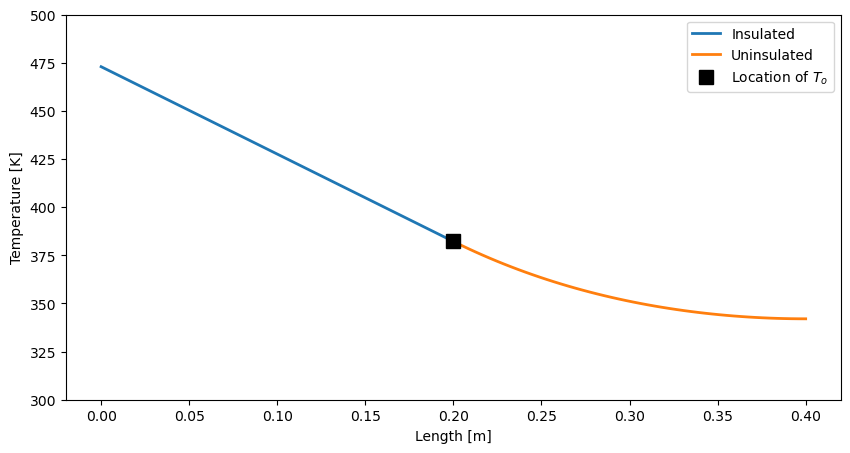

In [4]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(zz1,T1,'-',linewidth=2)
plt.plot(zz2,T2,'-',linewidth=2)
plt.plot(Lins,To,'ks',markersize=10, linewidth=4)
plt.ylim(300, 500)
plt.xlabel("Length [m]")
plt.ylabel("Temperature [K]")
plt.legend(["Insulated","Uninsulated","Location of $T_o$"])
plt.show()

Reconsider the problem wiht the following changes:
- Change material to 304 stainless (k = 14.9 W/mK)
- Increase insulation thickness to 300 mm while also keeping $L_o$ the same
- Keep insulation at 200 mm thick, but extend $L_o$ to 300 mm
- Decrease the diameter of the rod to 15 mm